In [6]:
# pip install kaggle
# We don't need to run that since it is already installed in Google Colab

In [7]:
# Configuring the path of Kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Kaggle API
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:05<00:00, 189MB/s]
100% 812M/812M [00:05<00:00, 165MB/s]


In [9]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Extracted")

Extracted


In [11]:
# Extracting the train and test data

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()


dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [12]:
import os

# Printing the names of the images
file_names = os.listdir('/content/train')
print(file_names)

['dog.9885.jpg', 'cat.926.jpg', 'dog.11259.jpg', 'cat.8985.jpg', 'cat.3728.jpg', 'dog.254.jpg', 'dog.3996.jpg', 'cat.8491.jpg', 'cat.9340.jpg', 'dog.1105.jpg', 'cat.10809.jpg', 'cat.1517.jpg', 'dog.5059.jpg', 'cat.6363.jpg', 'dog.2941.jpg', 'cat.1358.jpg', 'dog.507.jpg', 'cat.6919.jpg', 'cat.1008.jpg', 'cat.1201.jpg', 'dog.11755.jpg', 'dog.11490.jpg', 'dog.1051.jpg', 'cat.4012.jpg', 'dog.7223.jpg', 'cat.7045.jpg', 'cat.9917.jpg', 'dog.7538.jpg', 'cat.9007.jpg', 'cat.1076.jpg', 'dog.10957.jpg', 'cat.7278.jpg', 'cat.11752.jpg', 'cat.988.jpg', 'dog.4008.jpg', 'dog.402.jpg', 'dog.4249.jpg', 'cat.3549.jpg', 'dog.5124.jpg', 'cat.4448.jpg', 'cat.11581.jpg', 'dog.5339.jpg', 'cat.2703.jpg', 'cat.6423.jpg', 'cat.7801.jpg', 'cat.6247.jpg', 'dog.1218.jpg', 'dog.1566.jpg', 'dog.2459.jpg', 'cat.5370.jpg', 'dog.1378.jpg', 'cat.220.jpg', 'cat.6036.jpg', 'dog.11501.jpg', 'dog.7978.jpg', 'dog.4583.jpg', 'dog.10012.jpg', 'cat.1918.jpg', 'cat.9460.jpg', 'cat.4053.jpg', 'cat.827.jpg', 'cat.3767.jpg', 'dog.

In [13]:
# Counting number of files in train folder
print("Number of Images :", len(file_names))

Number of Images : 25000


Importing The Dependencies

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

**Displaying Images of Dogs and Cats**

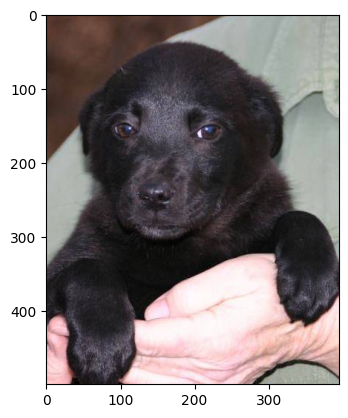

In [15]:
img = mpimg.imread('/content/train/dog.11636.jpg')
plt.imshow(img)

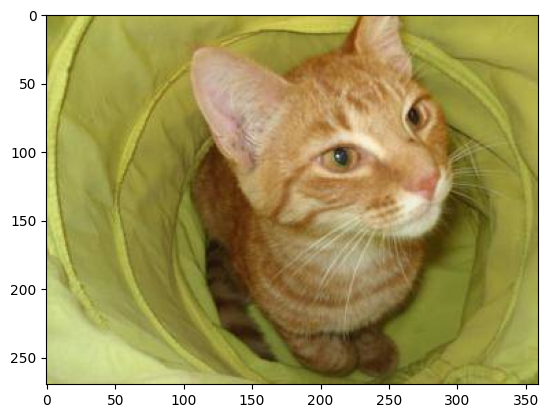

In [16]:
img = mpimg.imread('/content/train/cat.11636.jpg')
plt.imshow(img)

In [17]:
# Counting the number of dogs and cats images in the train folder

train_fld = os.listdir('/content/train/')

dogs, cats = 0, 0

for img in train_fld:
  name = img[0:3]
  if name == "dog":
    dogs += 1
  else:
    cats +=1

print("Number of Dogs are :", dogs)
print("Number of Cats are :", cats)

Number of Dogs are : 12500
Number of Cats are : 12500


**Resizing 2000 Images**

In [18]:
# Creating a new folder to save all the images
os.mkdir('/content/resized_image/')

In [19]:
original_folder_path = '/content/train/'
resized_folder_path = '/content/resized_image/'

img_arr = os.listdir('/content/train/')

for i in range(2000):

  image_name = img_arr[i]
  image_path = original_folder_path + image_name

  img = Image.open(image_path)
  img = img.resize((224, 224))
  img = img.convert("RGB")

  new_image_path = resized_folder_path + image_name
  img.save(new_image_path)

In [20]:
# Counting the number of dogs and cats in the resized image

resized_fld = os.listdir('/content/resized_image/')

dogs, cats = 0, 0

for img in resized_fld:
  name = img[0:3]
  if name == "dog":
    dogs += 1
  else:
    cats +=1

print("Number of Dogs are :", dogs)
print("Number of Cats are :", cats)

Number of Dogs are : 976
Number of Cats are : 1024


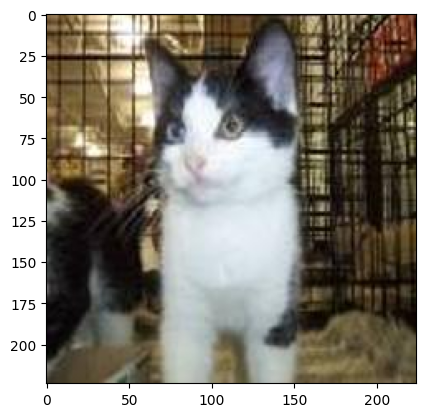

In [21]:
# Displaying Resized Image

img = mpimg.imread('/content/resized_image/cat.1000.jpg')
plt.imshow(img)

**Creating labels for resized images of dogs and cats**


Cat images -> 0

Dog images -> 1

In [22]:
# Creating the label's list

images = os.listdir('/content/resized_image/')

labels = []

for i in range(2000):
  image_name = images[i]
  name = image_name[0:3]

  if name == "dog":
    labels.append(1)
  else:
    labels.append(0)

In [23]:
print(images[0:5])
print(labels[0:5])

['dog.9885.jpg', 'cat.926.jpg', 'dog.11259.jpg', 'cat.8985.jpg', 'cat.3728.jpg']
[1, 0, 1, 0, 0]


**Converting Images into Numpy Arrays**

In [24]:
import cv2
import glob

In [25]:
images_path =  '/content/resized_image/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(images_path + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [26]:
print('Files :', files[0])
print('Dog and Cat Images :', dog_cat_images[0])

Files : /content/resized_image/dog.9885.jpg
Dog and Cat Images : [[[165  84  49]
  [163  85  48]
  [160  85  47]
  ...
  [138  74  33]
  [139  74  35]
  [138  73  34]]

 [[166  85  48]
  [165  86  47]
  [162  86  44]
  ...
  [139  75  34]
  [139  74  35]
  [138  73  34]]

 [[168  86  44]
  [168  87  42]
  [165  87  41]
  ...
  [140  76  35]
  [140  75  36]
  [139  74  35]]

 ...

 [[130  68  44]
  [133  72  46]
  [135  74  48]
  ...
  [ 74  36  18]
  [ 84  38  21]
  [ 90  39  23]]

 [[129  71  49]
  [132  75  50]
  [133  76  51]
  ...
  [ 77  37  19]
  [ 89  43  26]
  [ 99  49  31]]

 [[123  66  44]
  [127  70  48]
  [130  74  49]
  ...
  [ 78  38  20]
  [ 93  47  29]
  [105  55  37]]]


In [27]:
print('dog_cat_images Shape :', dog_cat_images.shape)
print('1st Element of dog_cat_images Shape :', dog_cat_images[0].shape)

dog_cat_images Shape : (2000, 224, 224, 3)
1st Element of dog_cat_images Shape : (224, 224, 3)


**Splitting Our Data**

In [28]:
X = dog_cat_images
y = np.asarray(labels)

In [29]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [32]:
print(X_train.shape, "and", X_test.shape)

(1600, 224, 224, 3) and (400, 224, 224, 3)


In [33]:
# Scaling our data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [36]:
print(X_train_scaled[0])

[[[0.57254902 0.63921569 0.74117647]
  [0.58039216 0.64705882 0.74901961]
  [0.59215686 0.65882353 0.76078431]
  ...
  [0.52156863 0.64313725 0.74117647]
  [0.48235294 0.61176471 0.71372549]
  [0.46666667 0.59607843 0.69803922]]

 [[0.58431373 0.65098039 0.75294118]
  [0.58823529 0.65490196 0.75686275]
  [0.59607843 0.6627451  0.76470588]
  ...
  [0.50588235 0.62745098 0.7254902 ]
  [0.48627451 0.60392157 0.70980392]
  [0.4745098  0.59215686 0.69803922]]

 [[0.59215686 0.65882353 0.76078431]
  [0.59215686 0.65882353 0.76078431]
  [0.59215686 0.65882353 0.76078431]
  ...
  [0.50588235 0.61960784 0.7254902 ]
  [0.50196078 0.61568627 0.72156863]
  [0.49803922 0.61176471 0.71764706]]

 ...

 [[0.39607843 0.48235294 0.58039216]
  [0.40392157 0.49019608 0.58823529]
  [0.40392157 0.49019608 0.58823529]
  ...
  [0.10980392 0.1372549  0.19607843]
  [0.11372549 0.14117647 0.2       ]
  [0.11372549 0.14117647 0.2       ]]

 [[0.40784314 0.49411765 0.59215686]
  [0.43137255 0.51764706 0.61568627]


#### Building The Neural Network

In [54]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

In [55]:
mobilenet_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4"

In [60]:
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [61]:
model = tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(2)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [62]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 68s 1s/step - loss: 0.2086 - acc: 0.9169
Epoch 2/5
50/50 [==============================] - 59s 1s/step - loss: 0.0730 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 60s 1s/step - loss: 0.0523 - acc: 0.9862
Epoch 4/5
29/50 [================>.............] - ETA: 23s - loss: 0.0428 - acc: 0.9925

In [66]:
loss, acc = model.evaluate(X_test_scaled, y_test)

13/13 [==============================] - 16s 1s/step - loss: 0.0271 - acc: 0.9950


In [67]:
 print("Test Loss :", loss)
 print("Test Accuracy :", acc)

Test Loss : 0.027103347703814507
Test Accuracy : 0.9950000047683716


**Predictive System**

Enter the path of the image to be classified : /content/dog.png


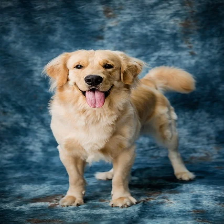

1/1 [==============================] - 0s 49ms/step
The image is of a Dog


In [70]:
input_image_path = input('Enter the path of the image to be classified : ')

input_image = cv2.imread(input_image_path)

input_image_resized = cv2.resize(input_image, (224, 224))

cv2_imshow(input_image_resized)

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

input_prediction_label = np.argmax(input_prediction)

if input_prediction_label == 0:
  print("The image is of a Cat")
else:
  print("The image is of a Dog")